In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
np.random.seed(42)

%matplotlib inline

In [2]:
pollution_df = pd.read_stata("./ARM_Data_extra/examples/pollution/pollution.dta")

In [3]:
pollution_df.describe()

,prec,jant,jult,ovr65,popn,educ,hous,dens,nonw,wwdrk,poor,hc,nox,so2,humid,mort
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,37.366665,33.983334,74.583333,8.798333,3.263167,10.973333,80.913333,3876.050000,11.870000,46.081667,14.373333,37.850000,22.65000,53.766667,57.666667,940.358433
std,9.984677,10.168899,4.763177,1.464552,0.135252,0.845299,5.141373,1454.102361,8.921148,4.613043,4.160096,91.977673,46.33329,63.390468,5.369931,62.206278
min,10.000000,12.000000,63.000000,5.600000,2.920000,9.000000,66.800000,1441.000000,0.800000,33.800000,9.400000,1.000000,1.00000,1.000000,38.000000,790.733000
25%,32.750000,27.000000,72.000000,7.675000,3.210000,10.400000,78.375000,3104.250000,4.950000,43.250000,12.000000,7.000000,4.00000,11.000000,55.000000,898.372000
50%,38.000000,31.500000,74.000000,9.000000,3.265000,11.050000,81.150000,3567.000000,10.400000,45.500000,13.200000,14.500000,9.00000,30.000000,57.000000,943.683000
75%,43.250000,40.000000,77.250000,9.700000,3.360000,11.500000,83.600000,4519.750000,15.650000,49.525000,15.150000,30.250000,23.75000,69.000000,60.000000,983.205750
max,60.000000,67.000000,85.000000,11.800000,3.530000,12.300000,90.700000,9699.000000,38.500000,59.700000,26.400000,648.000000,319.00000,278.000000,73.000000,1113.156000


In [4]:
pollution_df.head()

,prec,jant,jult,ovr65,popn,educ,hous,dens,nonw,wwdrk,poor,hc,nox,so2,humid,mort
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,11.7,21.0,15.0,59.0,59.0,921.870
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,14.4,8.0,10.0,39.0,57.0,997.875
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,12.4,6.0,6.0,33.0,54.0,962.354
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,20.6,18.0,8.0,24.0,56.0,982.291
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0,1071.289


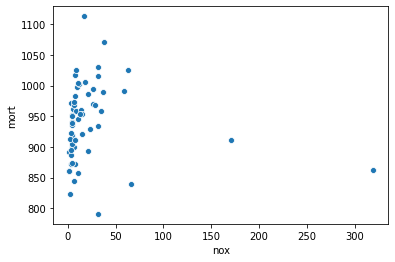

In [5]:
sns.scatterplot(data=pollution_df, x="nox", y="mort")

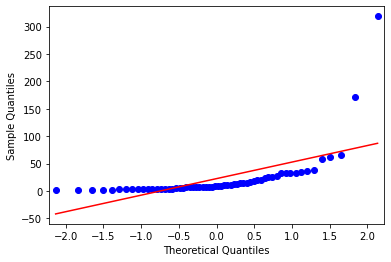

In [6]:
sm.graphics.qqplot(pollution_df.nox, line='r');

We better do a log-transformation here as the fistribbution is not normal and the `mort~nox` dependency doesn't seem to be linear.

In [7]:
pollution_df = pollution_df.assign(
    nox_log=lambda x: np.log(x.nox)
)

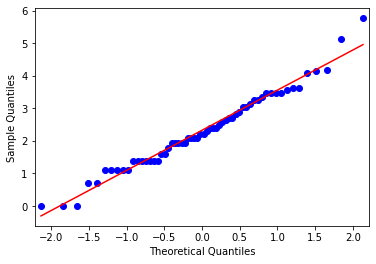

In [8]:
sm.graphics.qqplot(pollution_df.nox_log, line='r');

Clearly better here, let's see how the model goes.

In [9]:
nox_log_mdl = sm.OLS(exog=sm.add_constant(pollution_df[['nox_log']]), endog=pollution_df.mort).fit()
nox_log_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mort   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     5.406
Date:                Fri, 06 Mar 2020   Prob (F-statistic):             0.0236
Time:                        16:54:09   Log-Likelihood:                -329.79
No. Observations:                  60   AIC:                             663.6
Df Residuals:                      58   BIC:                             667.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        904.7245     17.173     52.684      0.000     870.350     939.099
nox_log       15.3355      6.596      2.325      0.024       2.133      28.538
==============================================================================
Omnibus:                        3.073   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.270
Skew:                          -0.285   Prob(JB):                        0.321
Kurtosis:                       3.764   Cond. No.                         6.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

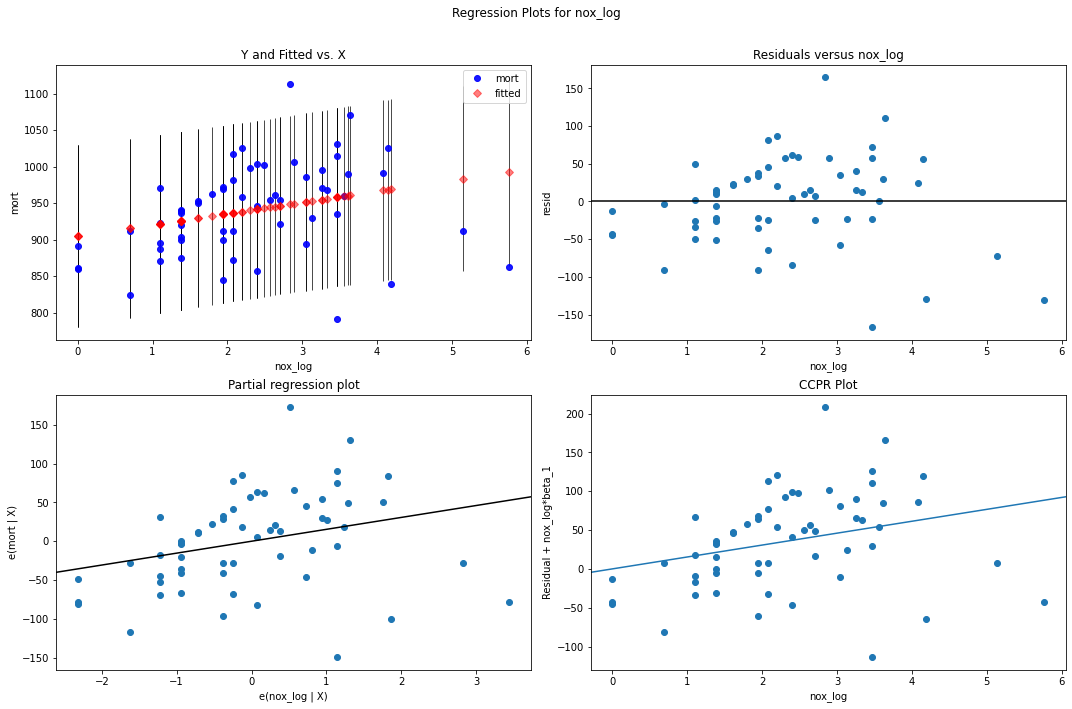

In [10]:
with plt.rc_context():
    plt.rc("figure", figsize=(15,10))
    sm.graphics.plot_regress_exog(nox_log_mdl, exog_idx="nox_log");

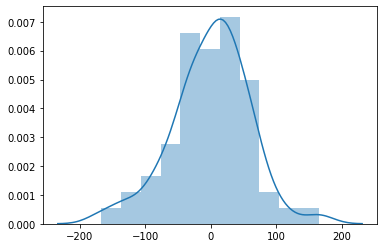

In [11]:
sns.distplot(nox_log_mdl.resid)

Seems to fit, the higher nitric oxide value is, the higher mortality gets. Yet the error rate is pretty big, a lot of variance is not explained.

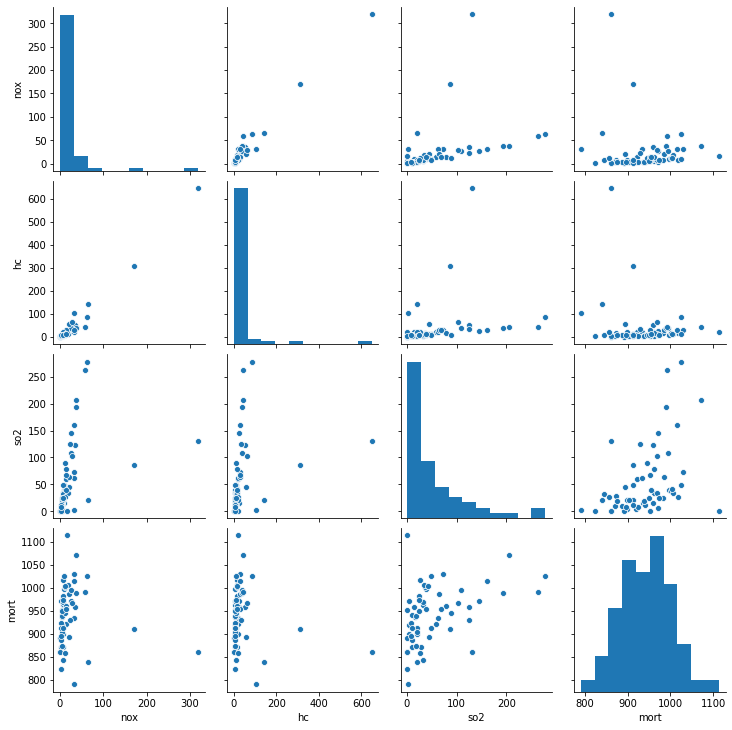

In [12]:
sns.pairplot(pollution_df[['nox', 'hc', 'so2', 'mort']])

All three proposed exog variables seem to require log-transformation.

In [13]:
pollution_mdl2 = pollution_df.assign(
    nox_log=lambda x: np.log(x.nox),
    hc_log=lambda x: np.log(x.hc),
    so2_log=lambda x: np.log(x.so2)
)[['nox_log', 'hc_log', 'so2_log', 'mort']]

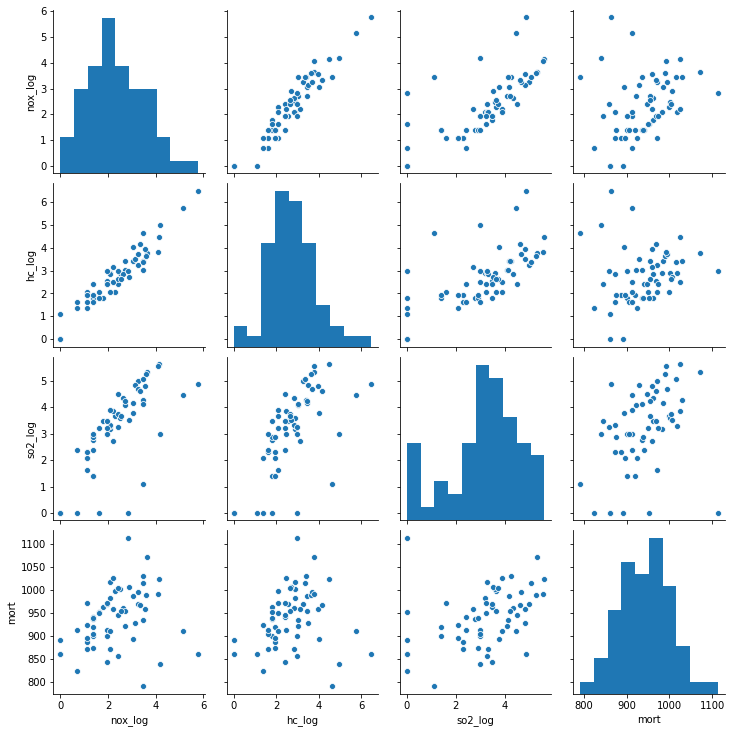

In [14]:
sns.pairplot(pollution_mdl2)

Seems to be some noise around low levels of so2. Also there's a clear correlation between `hc` and `nox`.

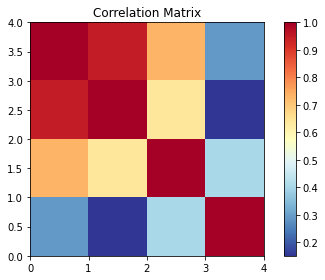

In [15]:
sm.graphics.plot_corr(pollution_mdl2.corr());

In [16]:
mdl2 = sm.OLS(exog=sm.add_constant(pollution_mdl2.drop(columns="mort")), endog=pollution_mdl2.mort).fit()
mdl2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mort   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     7.086
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           0.000404
Time:                        16:54:16   Log-Likelihood:                -322.81
No. Observations:                  60   AIC:                             653.6
Df Residuals:                      56   BIC:                             662.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        924.9652     21.449     43.125      0.000     881.999     967.932
nox_log       58.3364     21.751      2.682      0.010      14.765     101.908
hc_log       -57.3001     19.419     -2.951      0.005     -96.200     -18.400
so2_log       11.7618      7.165      1.642      0.106      -2.592      26.115
==============================================================================
Omnibus:                       10.151   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.284
Skew:                           0.722   Prob(JB):                      0.00355
Kurtosis:                       4.558   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ went up a lot, most of the variables contribute to the model quality. Funnily enough, increase in hydrocarbons reduces mortality. Brb, need to eat some cereal :)

Last piece of the exercise is a simplistic approach to cross-validation of the model.

In [17]:
pollution_mdl2_train = pollution_mdl2[:30]
pollution_mdl2_test = pollution_mdl2[30:]

mdl2_cv = sm.OLS(exog=sm.add_constant(pollution_mdl2_train.drop(columns="mort")), endog=pollution_mdl2_train.mort).fit()
mdl2_cv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mort   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2.922
Date:                Fri, 06 Mar 2020   Prob (F-statistic):             0.0528
Time:                        16:54:16   Log-Likelihood:                -159.00
No. Observations:                  30   AIC:                             326.0
Df Residuals:                      26   BIC:                             331.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        899.9675     25.706     35.009      0.000     847.127     952.808
nox_log       10.5654     29.594      0.357      0.724     -50.266      71.397
hc_log       -17.4750     26.212     -0.667      0.511     -71.354      36.404
so2_log       21.8677     12.324      1.774      0.088      -3.465      47.200
==============================================================================
Omnibus:                        0.783   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.836
Skew:                          -0.316   Prob(JB):                        0.658
Kurtosis:                       2.481   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
sm.tools.eval_measures.rmse(pollution_mdl2_train.mort, mdl2_cv.fittedvalues)

48.47820212284648

In [19]:
sm.tools.eval_measures.rmse(
    pollution_mdl2_test.mort, 
    mdl2_cv.predict(sm.add_constant(pollution_mdl2_test.drop(columns="mort")))
)

61.15505439667067

RMSE of the test set is higher which makes sense, so the model generalizes fine.